## Importing Libraries

In [ ]:
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report,balanced_accuracy_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("../py")
#from utils import *

from sklearn import linear_model, utils, svm
from sklearn.utils import resample
from imblearn.under_sampling import ClusterCentroids, EditedNearestNeighbours, RandomUnderSampler, TomekLinks, CondensedNearestNeighbour
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/TextExtractionCleanUP.py /content

In [ ]:
pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 36.4 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=aa1caf5e3a111894739584e615acc8f42373b40763fe0e2d3a9d6ef0b81625d2
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [ ]:
import TextExtractionCleanUP

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.read_csv("/content/Final_hate.csv")
df

,Unnamed: 0,Text,label
0,0,RT @MailOnline: The Nazi death gas so horrific...,0
1,1,Carlos Correa had gyalchester as his walkup mu...,0
2,2,"""THE FORCE AWAKENS: A Bad Lip Reading"" (Featur...",0
3,3,RT @HeeeyMonica: Papaya has to be the worst fr...,0
4,4,@Pineaqples @DenialEsports btw I watched where...,0
...,...,...,...
103216,103216,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,0
103217,103217,"you've gone and broke the wrong heart baby, an...",0
103218,103218,young buck wanna eat!!.. dat nigguh like I ain...,0
103219,103219,youu got wild bitches tellin you lies,0


## Pre-Processing

In [ ]:
# Expansion of short form words
df['Text'] = df['Text'].apply(lambda x: TextExtractionCleanUP.preprocess_english(x))
TextExtractionCleanUP.preprocessing_method(df,'Text')
# SpellCheck
TextExtractionCleanUP.spellCheck(df,'Text')

In [ ]:
df

,Unnamed: 0,Text,label
0,0,nazi death gas horrific even hitler feared using,0
1,1,carlos cornea gyalchester walkup music bad ass...,0
2,2,force awakens bad lip reading featuring mark h...,0
3,3,papaya worst fruit ever,0
4,4,btw watched watched pov stream boil feel retarded,0
...,...,...,...
103216,103216,muthafin lie right tl trash mine bible scriptu...,0
103217,103217,gone broke wrong heart baby drove redneck crazy,0
103218,103218,young buck wanna eat dat nigguh like aint fuck...,0
103219,103219,you got wild pitches telling lies,0


In [ ]:
df = df.fillna('')

In [ ]:
c = df.columns
c

Index(['Unnamed: 0', 'Text', 'label'], dtype='object')

In [ ]:
train = df['Text']
test = df['label']

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Train Test Split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train, test, test_size=0.2, shuffle = True, random_state = 8)


print("X_train shape: {}".format(X_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_val shape: {}".format(y_val.shape))


print("========================")

# Use the same function above for the validation set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (82576,)
X_val shape: (20645,)
y_train shape: (82576,)
y_val shape: (20645,)
X_train shape: (61932,)
y_train shape: (61932,)
X_test shape: (20644,)
y_test shape: (20644,)


In [ ]:
X_train.to_frame()
y_train.to_frame()
# Making Training Data 
trainingData = pd.concat([X_train, y_train], axis=1, join='inner')
trainingData

,Text,label
10461,friend mine ton ga next speedway cannot seem g...,0
23652,rhode island teen wants know year middle east ...,0
47078,capped bust half dollar 50c pigs xf45 ef45 rar...,0
82652,bitch please dont get shot doug,0
23789,look back americas challenges ahead hopeful fu...,0
...,...,...
85668,count nobody likes choke shit,0
72142,would link study afm,0
4898,congrats well deserved one best 7s players aro...,0
87450,everyone says letsmakeitawkward queer justmade...,0


In [ ]:
X_train

10461    friend mine ton ga next speedway cannot seem g...
23652    rhode island teen wants know year middle east ...
47078    capped bust half dollar 50c pigs xf45 ef45 rar...
82652                      bitch please dont get shot doug
23789    look back americas challenges ahead hopeful fu...
                               ...                        
85668                        count nobody likes choke shit
72142                                 would link study afm
4898     congrats well deserved one best 7s players aro...
87450    everyone says letsmakeitawkward queer justmade...
41547    showing us middle finger knows talk n actunlik...
Name: Text, Length: 61932, dtype: object

In [ ]:
x = trainingData.groupby('label').size()
x

label
0    54543
1     7389
dtype: int64

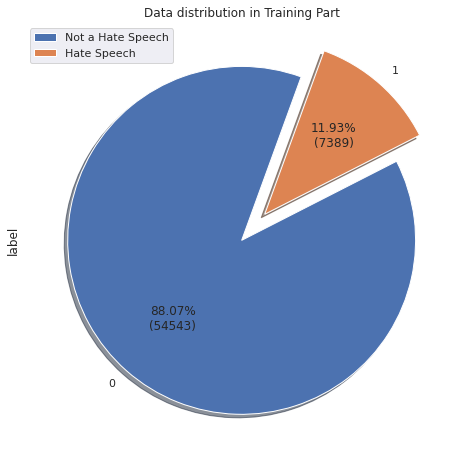

In [ ]:
import seaborn as sns
x = trainingData.label.value_counts()
sns.set()
explode = (0, 0.2)
labels = [r'Not a Hate Speech','Hate Speech']
x.plot(kind='pie', title='Data distribution in Training Part', figsize=[8,8],shadow=True, legend=True,
       explode = explode,startangle=70,autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*x.sum()))
plt.legend(labels, loc="best")
plt.show()

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Expansion of short form words
trainingData['Text'] = trainingData['Text'].apply(lambda x: TextExtractionCleanUP.preprocess_english(x))
TextExtractionCleanUP.preprocessing_method(trainingData,'Text')
# SpellCheck
TextExtractionCleanUP.spellCheck(trainingData,'Text')
# Lemmetize and tokenize
trainingData['Text'] = trainingData['Text'].apply(TextExtractionCleanUP.lemmatize_Tokenize_text)
trainingData['Text2'] = trainingData.Text.apply(lambda x: str(x)[1:-1]) 
trainingData

,Text,label,Text2
10461,"[friend, mine, ton, ga, next, speedway, cannot...",0,"'friend', 'mine', 'ton', 'ga', 'next', 'speedw..."
23652,"[rhode, island, teen, want, know, year, middle...",0,"'rhode', 'island', 'teen', 'want', 'know', 'ye..."
47078,"[capped, bust, half, dollar, 50c, pig, xf45, e...",0,"'capped', 'bust', 'half', 'dollar', '50c', 'pi..."
82652,"[bitch, please, dont, get, shot, doug]",0,"'bitch', 'please', 'dont', 'get', 'shot', 'doug'"
23789,"[look, back, america, challenge, ahead, hopefu...",0,"'look', 'back', 'america', 'challenge', 'ahead..."
...,...,...,...
85668,"[count, nobody, like, choke, shit]",0,"'count', 'nobody', 'like', 'choke', 'shit'"
72142,"[would, link, study, afm]",0,"'would', 'link', 'study', 'afm'"
4898,"[congrats, well, deserved, one, best, 7, playe...",0,"'congrats', 'well', 'deserved', 'one', 'best',..."
87450,"[everyone, say, letsmakeitawkward, queer, just...",0,"'everyone', 'say', 'letsmakeitawkward', 'queer..."


In [ ]:
X_train = trainingData['Text2']
y_train = trainingData['label']

In [ ]:
X_train

10461    'friend', 'mine', 'ton', 'ga', 'next', 'speedw...
23652    'rhode', 'island', 'teen', 'want', 'know', 'ye...
47078    'capped', 'bust', 'half', 'dollar', '50c', 'pi...
82652     'bitch', 'please', 'dont', 'get', 'shot', 'doug'
23789    'look', 'back', 'america', 'challenge', 'ahead...
                               ...                        
85668           'count', 'nobody', 'like', 'choke', 'shit'
72142                      'would', 'link', 'study', 'afm'
4898     'congrats', 'well', 'deserved', 'one', 'best',...
87450    'everyone', 'say', 'letsmakeitawkward', 'queer...
41547    'showing', 'u', 'middle', 'finger', 'know', 't...
Name: Text2, Length: 61932, dtype: object

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (61932,)
y_train shape: (61932,)
X_test shape: (20644,)
y_test shape: (20644,)


In [ ]:
# Now pre processing testing data
testingData = pd.concat([X_test, y_test], axis=1, join='inner')
testingData

,Text,label
73340,face_blowing_a_kiss,0
79601,real shit catch bitch game on8221,0
51712,,1
42148,added video playlist win trip star wars celebr...,0
67645,randiio,0
...,...,...
20640,richard amazing talent make us feel exactly ch...,0
42488,updates appear cosmetic primarily confined tot...,0
62160,blame,0
61660,kat completely rank cow god annie annoying mr ...,0


In [ ]:
# Expansion of short form words
testingData['Text'] = testingData['Text'].apply(lambda x: TextExtractionCleanUP.preprocess_english(x))
TextExtractionCleanUP.preprocessing_method(testingData,'Text')
# SpellCheck
TextExtractionCleanUP.spellCheck(testingData,'Text')
# Lemmetize and tokenize
testingData['Text'] = testingData['Text'].apply(TextExtractionCleanUP.lemmatize_Tokenize_text)
testingData['Text2'] = testingData.Text.apply(lambda x: str(x)[1:-1]) 
testingData

,Text,label,Text2
73340,[face_blowing_a_kiss],0,'face_blowing_a_kiss'
79601,"[real, shit, catch, bitch, game, on8221]",0,"'real', 'shit', 'catch', 'bitch', 'game', 'on8..."
51712,[],1,
42148,"[added, video, playlist, win, trip, star, war,...",0,"'added', 'video', 'playlist', 'win', 'trip', '..."
67645,[randiio],0,'randiio'
...,...,...,...
20640,"[richard, amazing, talent, make, u, feel, exac...",0,"'richard', 'amazing', 'talent', 'make', 'u', '..."
42488,"[update, appear, cosmetic, primarily, confined...",0,"'update', 'appear', 'cosmetic', 'primarily', '..."
62160,[blame],0,'blame'
61660,"[kat, completely, rank, cow, god, annie, annoy...",0,"'kat', 'completely', 'rank', 'cow', 'god', 'an..."


In [ ]:
X_test = testingData['Text2']
y_test = testingData['label']

In [ ]:
X_test

73340                                'face_blowing_a_kiss'
79601    'real', 'shit', 'catch', 'bitch', 'game', 'on8...
51712                                                     
42148    'added', 'video', 'playlist', 'win', 'trip', '...
67645                                            'randiio'
                               ...                        
20640    'richard', 'amazing', 'talent', 'make', 'u', '...
42488    'update', 'appear', 'cosmetic', 'primarily', '...
62160                                              'blame'
61660    'kat', 'completely', 'rank', 'cow', 'god', 'an...
62704    'sexist', 'driver', 'would', 'drive', 'stop', ...
Name: Text2, Length: 20644, dtype: object

## **Modeling**

In [ ]:
vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_train)
#vec = get_feature_names_out()
tfidf_val = vec.transform(X_test)

In [ ]:
print(tfidf_tr.shape,tfidf_val.shape)

(61932, 52487) (20644, 52487)


In [ ]:
print(tfidf_val)

  (0, 16609)	1.0
  (1, 41651)	0.2915427312365346
  (1, 37921)	0.3456750471311509
  (1, 33329)	0.6793596116481384
  (1, 19028)	0.3219590120753789
  (1, 8931)	0.43164344385404607
  (1, 6593)	0.2097819049312252
  (3, 50903)	0.2542975627169736
  (3, 49983)	0.2948209939403746
  (3, 49450)	0.2399548251167816
  (3, 47576)	0.3400638210189212
  (3, 43873)	0.3135764914722437
  (3, 35589)	0.32956368220787297
  (3, 16386)	0.32224050980537366
  (3, 15785)	0.3164670013442298
  (3, 9082)	0.4059372468711552
  (3, 2484)	0.31539469959747174
  (4, 37706)	1.0
  (5, 51761)	0.35966192082579546
  (5, 41437)	0.43077324763091335
  (5, 20843)	0.36026376637320173
  (5, 20242)	0.44544985464107956
  (5, 16927)	0.3269278085378792
  (5, 6118)	0.4999803650913413
  (6, 50103)	0.2687973097198753
  :	:
  (20640, 16484)	0.3948185847741388
  (20640, 11325)	0.3608417703266197
  (20640, 10847)	0.4054860727837353
  (20640, 4048)	0.3411656380688211
  (20641, 6834)	1.0
  (20642, 50168)	0.17041299196617302
  (20642, 48356)	0.33

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, average_precision_score, confusion_matrix, roc_auc_score
from tqdm import tqdm
import re
import nltk
from nltk.stem.porter import PorterStemmer
from textblob import Word
import datetime
import pandas as pd
import requests
import sys
sys.path.append("../py")

import gensim
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def accuracy(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_y_hat))

def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

def precision(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

def recall(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    # Find True Positive
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    # Find False Negative
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn)

In [ ]:
print(tfidf_tr.shape)

(61932, 52487)


In [ ]:
print(tfidf_tr.shape,y_train.shape,tfidf_val.shape,y_test.shape)

(61932, 52487) (61932,) (20644, 52487) (20644,)


In [ ]:
from sklearn.metrics import classification_report

# **SMOTE-ENN**

In [ ]:
sme = SMOTEENN(sampling_strategy="minority")
X_tr_sme, y_tr_sme = sme.fit_resample(tfidf_tr, y_train)
counter_sme = Counter(y_tr_sme)
print("SMOTE-ENN: ", counter_sme)

SMOTE-ENN:  Counter({1: 53737, 0: 4342})


Accuracy:  0.1423658205774075
F1 Score:  0.21773516546635444
ROC-AUC:  0.792326617313444
Recall:  0.9963606955115245
Precision:  0.12222222222222222
PR-AUC:  0.3758744727430404
              precision    recall  f1-score   support

           0       0.98      0.03      0.05     18171
           1       0.12      1.00      0.22      2473

    accuracy                           0.14     20644
   macro avg       0.55      0.51      0.13     20644
weighted avg       0.88      0.14      0.07     20644



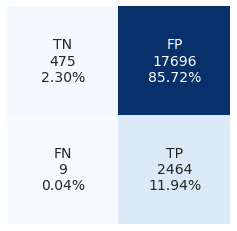

In [ ]:
nb2 = MultinomialNB().fit(X_tr_sme, y_tr_sme)
y_pr_nb2_val = nb2.predict(tfidf_val)
print(classification_report(y_test, y_pr_nb2_val))

Accuracy:  0.2644351869792676
F1 Score:  0.2404081836826572
ROC-AUC:  0.7401076082646856
Recall:  0.9716942984229681
Precision:  0.1371731932869049
PR-AUC:  0.26513340129969715
              precision    recall  f1-score   support

           0       0.98      0.17      0.29     18171
           1       0.14      0.97      0.24      2473

    accuracy                           0.26     20644
   macro avg       0.56      0.57      0.26     20644
weighted avg       0.88      0.26      0.28     20644



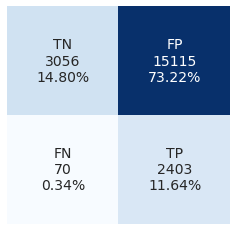

In [ ]:
rf2 = RandomForestClassifier(n_estimators=100).fit(X_tr_sme, y_tr_sme)
y_pr_rf2_val = rf2.predict(tfidf_val)
print(classification_report(y_test, y_pr_rf2_val))

Accuracy:  0.20921333074985468
F1 Score:  0.2302070071202905
ROC-AUC:  0.8130440756204653
Recall:  0.9870602507076426
Precision:  0.13029785416889078
PR-AUC:  0.5112568839308249
              precision    recall  f1-score   support

           0       0.98      0.10      0.19     18171
           1       0.13      0.99      0.23      2473

    accuracy                           0.21     20644
   macro avg       0.56      0.55      0.21     20644
weighted avg       0.88      0.21      0.19     20644



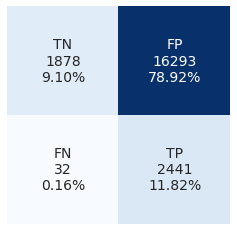

In [ ]:
log2 = LogisticRegression().fit(X_tr_sme, y_tr_sme)
y_pr_log2_val = log2.predict(tfidf_val)
print(classification_report(y_test, y_pr_log2_val))

In [ ]:
svc2 = svm.LinearSVC(random_state=42).fit(X_tr_sme, y_tr_sme)
y_pr_svc2_val = svc2.predict(tfidf_val)
print(classification_report(y_test, y_pr_svc2_val))

Accuracy:  0.30066847510172445
F1:  0.24819038691871065
Recall:  0.9636069551152446
Precision:  0.14243873281530187
ROC-AUC:  0.7792771140802089
PR-AUC:  0.38962641164310596
              precision    recall  f1-score   support

           0       0.98      0.21      0.35     18171
           1       0.14      0.96      0.25      2473

    accuracy                           0.30     20644
   macro avg       0.56      0.59      0.30     20644
weighted avg       0.88      0.30      0.33     20644



Accuracy:  0.3092423948847123
F1 Score:  0.2510504201680672
ROC-AUC:  0.8021552140142875
Recall:  0.9664375252729478
Precision:  0.14426269089153135
PR-AUC:  0.33881758006758794
              precision    recall  f1-score   support

           0       0.98      0.22      0.36     18171
           1       0.14      0.97      0.25      2473

    accuracy                           0.31     20644
   macro avg       0.56      0.59      0.31     20644
weighted avg       0.88      0.31      0.35     20644



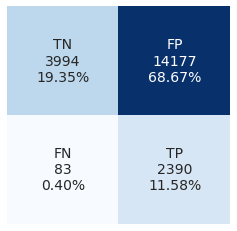

In [ ]:
abc2 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
    ).fit(X_tr_sme, y_tr_sme)
y_pr_abc2_val = abc2.predict(tfidf_val)
print(classification_report(y_test, y_pr_abc2_val))

Accuracy:  0.21042433636892074
F1 Score:  0.22909572455542943
ROC-AUC:  0.6889248526650147
Recall:  0.9793772745653053
Precision:  0.1297198864549301
PR-AUC:  0.31941113638602175
              precision    recall  f1-score   support

           0       0.97      0.11      0.19     18171
           1       0.13      0.98      0.23      2473

    accuracy                           0.21     20644
   macro avg       0.55      0.54      0.21     20644
weighted avg       0.87      0.21      0.20     20644



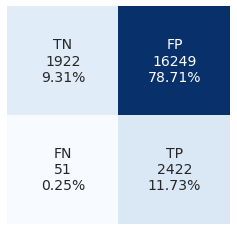

In [ ]:
gbc2 = GradientBoostingClassifier().fit(X_tr_sme, y_tr_sme)
y_pr_gbc2_val = gbc2.predict(tfidf_val)
print(classification_report(y_test, y_pr_gbc2_val))

In [ ]:
data2 = {'Accuracy': [accuracy(y_test, y_pr_nb2_val), 
                      accuracy(y_test, y_pr_rf2_val), 
                      accuracy(y_test, y_pr_log2_val), 
                      accuracy(y_test, y_pr_svc2_val),
                      accuracy(y_test, y_pr_abc2_val),
                      accuracy(y_test, y_pr_gbc2_val)],
        'F1 Score': [f1(y_test, y_pr_nb2_val), 
                     f1(y_test, y_pr_rf2_val), 
                     f1(y_test, y_pr_log2_val), 
                     f1(y_test, y_pr_svc2_val),
                     f1(y_test, y_pr_abc2_val),
                     f1(y_test, y_pr_gbc2_val)],
        'Recall': [recall(y_test, y_pr_nb2_val), 
                   recall(y_test, y_pr_rf2_val), 
                   recall(y_test, y_pr_log2_val),
                   recall(y_test, y_pr_svc2_val),
                   recall(y_test, y_pr_abc2_val),
                   recall(y_test, y_pr_gbc2_val)],
        'Precision': [precision(y_test, y_pr_nb2_val), 
                      precision(y_test, y_pr_rf2_val), 
                      precision(y_test, y_pr_log2_val),
                      precision(y_test, y_pr_svc2_val),
                      precision(y_test, y_pr_abc2_val),
                      precision(y_test, y_pr_gbc2_val)]}
metrics2 = pd.DataFrame(data=data2, index = ['SM_ENN Multinomial Naive Bayes', 
                                             'SM_ENN Random Forest',
                                             'SM_ENN Logistic Regression',
                                             'SM_ENN Support Vector Machine', 
                                             'SM_ENN AdaBoost Classifier', 
                                             'SM_ENN Gradient Boosting Classifier'])

In [ ]:
metrics2.to_csv("outputwithsmote.csv")
metrics2

,Accuracy,F1 Score,Recall,Precision,ROC-AUC,PR-AUC
SM_ENN Multinomial Naive Bayes,0.142366,0.217735,0.996361,0.122222,0.792327,0.375874
SM_ENN Random Forest,0.264435,0.240408,0.971694,0.137173,0.740108,0.265133
SM_ENN Logistic Regression,0.209213,0.230207,0.987060,0.130298,0.813044,0.511257
SM_ENN Support Vector Machine,0.300668,0.248190,0.963607,0.142439,0.779277,0.389626
SM_ENN AdaBoost Classifier,0.309242,0.251050,0.966438,0.144263,0.802155,0.338818
SM_ENN Gradient Boosting Classifier,0.210424,0.229096,0.979377,0.129720,0.688925,0.319411
